## 6.10 Homework

The goal of this homework is to create a tree-based regression model for prediction apartment prices (column `'price'`).

In this homework we'll again use the New York City Airbnb Open Data dataset - the same one we used in homework 2 and 3.

You can take it from [Kaggle](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv)
or download from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv)
if you don't want to sign up to Kaggle.


For this homework, we prepared a [starter notebook](homework-6-starter.ipynb). 


## Loading the data

* Use only the following columns:
    * `'neighbourhood_group',`
    * `'room_type',`
    * `'latitude',`
    * `'longitude',`
    * `'minimum_nights',`
    * `'number_of_reviews','reviews_per_month',`
    * `'calculated_host_listings_count',`
    * `'availability_365',`
    * `'price'`
* Fill NAs with 0
* Apply the log tranform to `price`
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1
* Use `DictVectorizer` to turn the dataframe into matrices

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
columns = [
    'neighbourhood_group', 'room_type', 'latitude', 'longitude',
    'minimum_nights', 'number_of_reviews','reviews_per_month',
    'calculated_host_listings_count', 'availability_365',
    'price'
]

df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv', usecols=columns)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   latitude                        48895 non-null  float64
 2   longitude                       48895 non-null  float64
 3   room_type                       48895 non-null  object 
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               38843 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 3.7+ MB


In [5]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
df.reviews_per_month = df.reviews_per_month.fillna(0)

<AxesSubplot:>

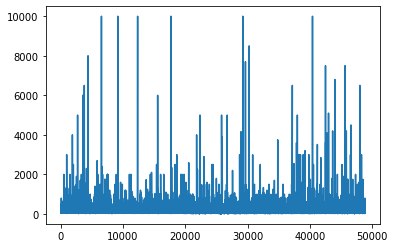

In [7]:
df["price"].plot()

<AxesSubplot:>

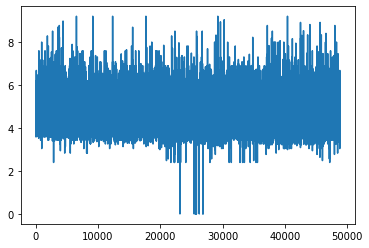

In [8]:
np.log1p(df["price"]).plot()

In [9]:
df['price'] = np.log1p(df["price"])

In [13]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

del df_train['price']
del df_val['price']
del df_test['price']

In [14]:
(df_train.shape, df_val.shape, df_test.shape)

((29337, 9), (9779, 9), (9779, 9))

In [15]:
(y_train.shape, y_val.shape, y_test.shape)

((29337,), (9779,), (9779,))

In [16]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

## Question 1

Let's train a decision tree regressor to predict the price variable. 

* Train a model with `max_depth=1`


Which feature is used for splitting the data?

* `room_type`
* `neighbourhood_group`
* `number_of_reviews`
* `reviews_per_month`

### Q1 ANSWER ::: room_type

In [18]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [25]:
from sklearn.tree import export_text

print(export_text(dt, feature_names = dv.get_feature_names()))

|--- room_type=Entire home/apt <= 0.50
|   |--- value: [4.29]
|--- room_type=Entire home/apt >  0.50
|   |--- value: [5.15]



## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1`  (optional - to make training faster)


What's the RMSE of this model on validation?

* 0.059
* 0.259
* 0.459
* 0.659

### Q2 Answer ::: 0.459

In [28]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [29]:
y_pred = rfr.predict(X_train)

In [33]:
y_pred = rfr.predict(X_val)

score = mean_squared_error(y_pred, y_val, squared=False)
score

0.4615632303514057

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10
* Set `random_state` to `1`
* Evaluate the model on the validation dataset


After which value of `n_estimators` does RMSE stop improving?

- 10
- 50
- 70
- 120

### Q3 Answer ::: 50

In [37]:
np.linspace(10, 200, 20)

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.,
       120., 130., 140., 150., 160., 170., 180., 190., 200.])

In [41]:
est = np.linspace(10, 200, 20)

for e in est:
    print(e)
    rfr = RandomForestRegressor(n_estimators=int(e), random_state=1, n_jobs=-1)
    rfr.fit(X_train, y_train)
    y_pred = rfr.predict(X_val)
    score = mean_squared_error(y_pred, y_val, squared=False)
    print(score)

10.0
0.46156323035140573
20.0
0.4481844037246563
30.0
0.445534982591036
40.0
0.4436370400686574
50.0
0.4423252158693789
60.0
0.4416390063083674
70.0
0.4412400708145094
80.0
0.4411253881867737
90.0
0.4405506726295168
100.0
0.4399734361245008
110.0
0.4394728605417527
120.0
0.43923581828746266
130.0
0.4393024606141518
140.0
0.4390088112588317
150.0
0.4389016090216187
160.0
0.438700402552987
170.0
0.4386273317291687
180.0
0.43876507353873545
190.0
0.4387232276613794
200.0
0.4387504763480828


## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values, try different values of `n_estimators` from 10 till 200 (with step 10)
* Fix the random seed: `random_state=1`



What's the best `max_depth`:

* 10
* 15
* 20
* 25

### Q4 Answer ::: 15

In [46]:
est = np.linspace(10, 200, 20)
md= [10, 15, 20, 25]

score = []

for d in md:
    print(d)
    for e in est:
        print(e)
        rfr = RandomForestRegressor(n_estimators=int(e), random_state=1, n_jobs=-1, max_depth = d)
        rfr.fit(X_train, y_train)
        y_pred = rfr.predict(X_val)
        s = mean_squared_error(y_pred, y_val, squared=False)
        
        score.append((d, e, s))

10
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
100.0
110.0
120.0
130.0
140.0
150.0
160.0
170.0
180.0
190.0
200.0
15
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
100.0
110.0
120.0
130.0
140.0
150.0
160.0
170.0
180.0
190.0
200.0
20
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
100.0
110.0
120.0
130.0
140.0
150.0
160.0
170.0
180.0
190.0
200.0
25
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
100.0
110.0
120.0
130.0
140.0
150.0
160.0
170.0
180.0
190.0
200.0


In [47]:
columns = ['max_depth', 'estimators', 'rmse']
df_scores = pd.DataFrame(score, columns=columns)

<AxesSubplot:xlabel='estimators', ylabel='max_depth'>

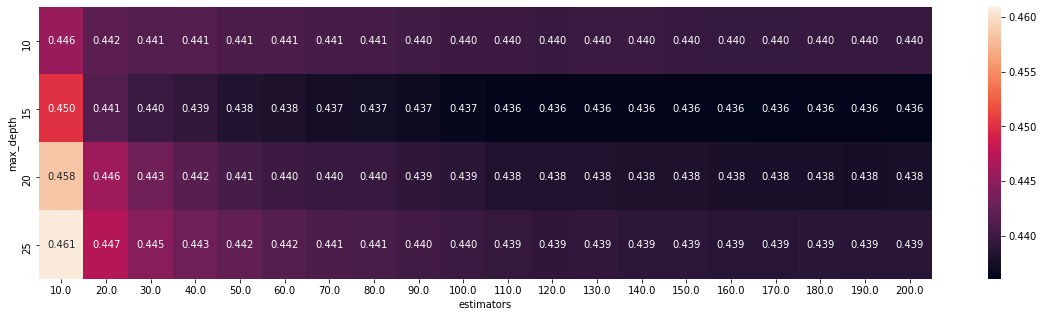

In [51]:
plt.figure(figsize=(20, 5))

df_scores_pivot = df_scores.pivot(index='max_depth', columns='estimators', values='rmse')
df_scores_pivot.round(3)
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [57]:
df_scores.groupby('max_depth').agg('rmse').mean()

max_depth
10    0.440595
15    0.437851
20    0.440294
25    0.441573
Name: rmse, dtype: float64

**Bonus question (not graded):**

Will the answer be different if we change the seed for the model?

### Answer ::: NO

In [58]:
est = np.linspace(10, 200, 20)
md= [10, 15, 20, 25]

score = []

for d in md:
    print(d)
    for e in est:
        print(e)
        rfr = RandomForestRegressor(n_estimators=int(e), random_state=20, n_jobs=-1, max_depth = d)
        rfr.fit(X_train, y_train)
        y_pred = rfr.predict(X_val)
        s = mean_squared_error(y_pred, y_val, squared=False)
        
        score.append((d, e, s))

10
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
100.0
110.0
120.0
130.0
140.0
150.0
160.0
170.0
180.0
190.0
200.0
15
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
100.0
110.0
120.0
130.0
140.0
150.0
160.0
170.0
180.0
190.0
200.0
20
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
100.0
110.0
120.0
130.0
140.0
150.0
160.0
170.0
180.0
190.0
200.0
25
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
100.0
110.0
120.0
130.0
140.0
150.0
160.0
170.0
180.0
190.0
200.0


In [59]:
columns = ['max_depth', 'estimators', 'rmse']
df_scores = pd.DataFrame(score, columns=columns)
df_scores.groupby('max_depth').agg('rmse').mean()

max_depth
10    0.440832
15    0.438249
20    0.440793
25    0.442247
Name: rmse, dtype: float64

## Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorith, it finds the best split. 
When doint it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the imporatant features 
for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parametes:
    * `n_estimators=10`,
    * `max_depth=20`,
    * `random_state=1`,
    * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature? 

* `neighbourhood_group=Manhattan`
* `room_type=Entire home/apt`	
* `longitude`
* `latitude`

 ### Q5 Answer ::: room_type=Entire home/apt

In [61]:
rfr = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [69]:
rfr.feature_importances_.round(2)

array([0.08, 0.03, 0.15, 0.15, 0.05, 0.  , 0.  , 0.03, 0.  , 0.  , 0.04,
       0.05, 0.39, 0.  , 0.01])

In [65]:
dv.get_feature_names()

['availability_365',
 'calculated_host_listings_count',
 'latitude',
 'longitude',
 'minimum_nights',
 'neighbourhood_group=Bronx',
 'neighbourhood_group=Brooklyn',
 'neighbourhood_group=Manhattan',
 'neighbourhood_group=Queens',
 'neighbourhood_group=Staten Island',
 'number_of_reviews',
 'reviews_per_month',
 'room_type=Entire home/apt',
 'room_type=Private room',
 'room_type=Shared room']

In [74]:
from sklearn.tree import export_text

r = export_text(rfr.estimators_[0], feature_names=dv.get_feature_names())
print(r[0:50])

|--- room_type=Entire home/apt <= 0.50
|   |--- ne


## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` first to `0.1` and then to `0.01`

What's the best eta?

* 0.3
* 0.1
* 0.01

### Q6 Answer ::: 0.3

In [75]:
import xgboost as xgb

In [76]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [77]:
dtrain

In [78]:
dval

In [79]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

In [80]:
model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [81]:
y_pred = model.predict(dval)

In [84]:
y_pred

array([4.751342 , 4.7776213, 5.3586164, ..., 5.1834264, 4.7382045,
       5.180919 ], dtype=float32)

In [85]:
y_val

array([5.01063529, 3.93182563, 5.01727984, ..., 5.170484  , 4.60517019,
       4.75359019])

In [88]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [89]:
watchlist

[(<xgboost.core.DMatrix at 0x29dac7f17c8>, 'train'),
 (<xgboost.core.DMatrix at 0x29dac7ef348>, 'val')]

In [91]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, verbose_eval = 5, evals=watchlist)

In [92]:
s = output.stdout

In [93]:
print(s[:200])

[0]	train-rmse:3.87217	val-rmse:3.86889
[5]	train-rmse:2.31905	val-rmse:2.31692
[10]	train-rmse:1.41910	val-rmse:1.41786
[15]	train-rmse:0.91299	val-rmse:0.91348
[20]	train-rmse:0.64528	val-rmse:0.648


In [94]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, verbose_eval = 5, evals=watchlist)

In [95]:
s = output.stdout

In [96]:
print(s[:200])

[0]	train-rmse:4.25336	val-rmse:4.25010
[5]	train-rmse:4.04779	val-rmse:4.04454
[10]	train-rmse:3.85242	val-rmse:3.84921
[15]	train-rmse:3.66674	val-rmse:3.66359
[20]	train-rmse:3.49030	val-rmse:3.487


In [97]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, verbose_eval = 5, evals=watchlist)

In [98]:
s = output.stdout
print(s[:200])

[0]	train-rmse:3.02752	val-rmse:3.02415
[5]	train-rmse:0.67490	val-rmse:0.67752
[10]	train-rmse:0.43912	val-rmse:0.44981
[15]	train-rmse:0.42259	val-rmse:0.43827
[20]	train-rmse:0.41716	val-rmse:0.436


## Submit the results


Submit your results here: https://forms.gle/wQgFkYE6CtdDed4w8

It's possible that your answers won't match exactly. If it's the case, select the closest one.


## Deadline


The deadline for submitting is 20 October 2021, 17:00 CET (Wednesday). After that, the form will be closed.


## Nagivation

* [Machine Learning Zoomcamp course](../)
* [Session 6: Decision Trees and Ensemble Learning](./)
* Previous: [Explore more](11-explore-more.md)